# Part I - (Ford go bike dataset analysis )
## by (abdulaziz alomar)

## Introduction
The Bay Area's bike sharing program is called Ford GoBike. A pilot program for the area called Bay Area Bike Share debuted in 2019 and features 700 bikes and 70 stations around San Francisco and San Jose. Ford GoBike will have 7,000 bikes available in San Francisco, the East Bay, and San Jose after the expansion is finished.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info

<bound method DataFrame.info of         duration_sec                start_time                  end_time  \
0              52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1              42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2              61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3              36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4               1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5               1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6               1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7               1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8               1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9               1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   
10               458  2019-02-28 23:57:57.2110  2019-03-01 00:05:35.4350   
11               506  2019-02-28 23:56:55.5400  2019-03-

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# w will drop the unwanted columns
df = df.drop(['start_station_id', 'start_station_name','end_station_id', 'end_station_name'], 
             axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 16.8+ MB


In [7]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
df.member_birth_year.isna().sum()

8265

In [9]:
(df.member_birth_year.isna().sum() / df.member_birth_year.shape[0]) *100

4.506248228033062

there are only 4.5% of 8265 the whole data set with no brith year 
we will be removing them by chainging the 

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['age'] = 2019-df['member_birth_year']

In [13]:
d = df[pd.DatetimeIndex(df.start_time).date != pd.DatetimeIndex(df.end_time).date]
d
df['day'] = df.start_time.dt.day_name()
df.loc[pd.DatetimeIndex(df.start_time).date != pd.DatetimeIndex(df.end_time).date , 'day'] = d.end_time.dt.day_name()

In [14]:
from math import sin, cos, sqrt, atan2, radians

def distance_from_startStation_to_endStation (df ,lat1,lon1,lat2,lon2):
   
    R = 6373.0
    lat1 = df[lat1]
    lat2 = df[lat2]
    lon1 = df[lon1]
    lon2 = df[lon2]
    lon1 , lat1 , lon2,lat2 = map(np.radians , [lon1 , lat1 , lon2,lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return np.float64(round(1000*distance))

In [15]:
df['distance'] = distance_from_startStation_to_endStation(df ,'start_station_longitude', 'start_station_latitude','end_station_longitude','end_station_latitude')


In [16]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')
df['user_type'] = df['user_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 15 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null datetime64[ns]
end_time                   175147 non-null datetime64[ns]
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null category
member_birth_year          175147 non-null int64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
age                        175147 non-null int64
day                        175147 non-null object
distance                   175147 non-null float64
dtypes: category(1), datetime64[ns](2), float64(5), int64(4), object(3)
memory usage: 20.2+ MB


In [17]:
d = df[df.start_time.dt.date != df.end_time.dt.date]
df['day'] = df.start_time.dt.day_name()
df.loc[df.start_time.dt.date != df.end_time.dt.date, 'day'] = d.end_time.dt.day_name()

In [18]:
day_order = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'],
                           categories= day_order,
                           ordered = True)

In [19]:
df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,day,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,1984,Male,No,35,Friday,361.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,1972,Male,No,47,Friday,2642.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,Friday,267.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,Friday,2649.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,37.770407,-122.391198,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,Friday,2324.0


In [20]:
df.shape

(175147, 15)

In [21]:
df.groupby('member_gender')['duration_sec'].mean()

member_gender
Female    779.070390
Male      672.639069
Other     996.515334
Name: duration_sec, dtype: float64

### What is the structure of your dataset?

>((175147, 14)) rows / columns
### What is/are the main feature(s) of interest in your dataset?

> the main features i will be foucasing on are 
-gender
-age 
-ride duration 
-and the distance



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

the start date time and gender of member and  birth year and distance.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


(10, 60)

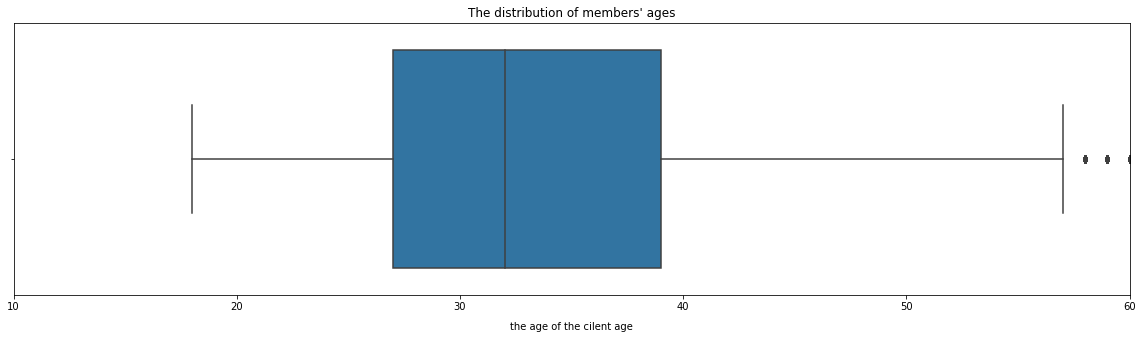

In [22]:
plt.figure(figsize=(20,5))
sb.boxplot( data=df, x='age')
plt.title("The distribution of members' ages",y=1)
plt.xlabel("the age of the cilent age", labelpad=10);
plt.xlim(10,60)

In [23]:
## we need this function to determin the age ranges 
def age_bins(x):
    if 10<=x<20:
        return '10 - 20'
    elif 20<=x<30:
        return '20 - 30'
    elif 30<=x<40:
        return '30 - 40'
    elif 40<=x<50:
        return '40 - 50'
    elif 50<=x<=60:
        return '50 - 60'
    else:
        return x
df['member_age_bins'] = df['age'].apply(age_bins)

>the  avarage user age is  between  25 and 39

Text(0.5,1,'Trip duration')

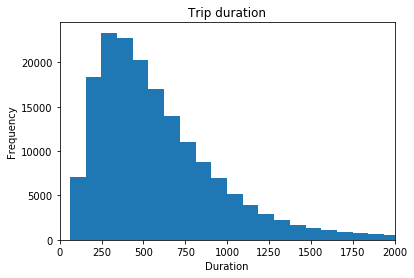

In [24]:
plt.hist( data= df, x ='duration_sec', bins = 900);
plt.xlim(0,2000)
plt.xlabel('Duration')
plt.ylabel ('Frequency')
plt.title('Trip duration')



>the distence of the each trip is between 250m and 750m

Text(0.5,1,'Distriubtiuon bike')

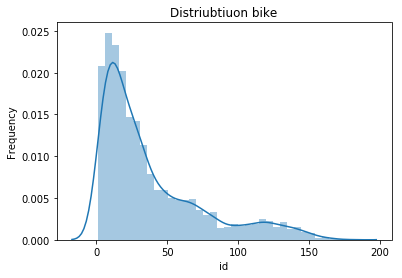

In [25]:

sb.distplot(df['bike_id'].value_counts())
plt.xlabel('id')
plt.ylabel('Frequency')
plt.title('Distriubtiuon bike')

>the distriubtiuon of bike is from 1 to 50 

Text(0.5,0,'User distribtuon')

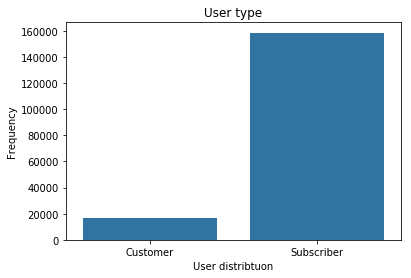

In [26]:
base_color=sb.color_palette()[0]
sb.countplot(data= df , x='user_type', color= base_color)
plt.title('User type')
plt.ylabel('Frequency')
plt.xlabel('User distribtuon')

>there are more subscrabier than customers 

In [27]:
 gender_df = df.groupby('member_gender').agg({'bike_id':'count'})
gender_df.rename(columns={'bike_id':'count'}, inplace=True)
gender_df.head()

,count
member_gender,
Female,40844
Male,130651
Other,3652


In [28]:
 gender_df['percent'] = (gender_df['count'] /gender_df['count'].sum()) *100
gender_df.head()

,count,percent
member_gender,,
Female,40844,23.319840
Male,130651,74.595054
Other,3652,2.085106


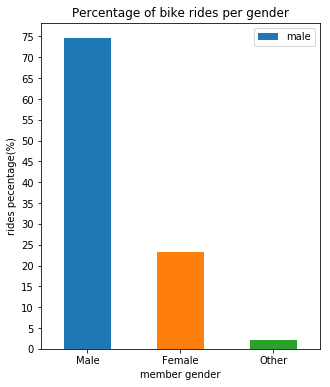

In [29]:
gender_df['percent'].sort_values(ascending=False).plot(kind='bar', figsize=(5,6))
plt.title('Percentage of bike rides per gender',)
plt.xlabel('member gender',)
plt.ylabel('rides pecentage(%)',)
plt.xticks(rotation=360)
plt.yticks([x for x in range(0,80,5)]);
plt.legend(['male','other'] );

> the male riders are almost 3 times the number of female riders

In [ ]:
sb.barplot(data=df , x = 'member_gender' , y = 'duration_sec' , hue = 'bike_share_for_all_trip',estimator= sum );

we can see from the chart that the majoirty do not use the bike share for all trip

In [ ]:
base_color= sb.color_palette()[0]
sb.countplot(data= df , x='day' , color= base_color)
sb.set(font_scale=0.90)
plt.title('distrubtion', size=13)
plt.xlabel('days')
plt.ylabel('count')

>the day with the most rides are thursdays 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> there is no unusual point form what i have seen 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i did change with the age of becuase the null values 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
base_color= sb.color_palette()[0]
df.groupby('user_type')['duration_sec'].mean().plot(kind='bar', figsize=(8,5) ,color= base_color)
plt.title('Average trip duration per user type')
plt.ylabel('Trip duration in minutes')
plt.xlabel('user type')
plt.xticks(rotation=360);

> the customer has more durations than the subscariber  

In [ ]:
df.groupby('user_type')['age'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average age for each user type')
plt.ylabel('age ')
plt.xlabel('user type')
plt.xticks(rotation=360);

the customer has a close Average age to the subsciber 

In [ ]:
sb.boxplot(data =df, x='user_type', y='duration_sec')
plt.ylabel('the duration')
plt.xlabel(' the user type')
plt.ylim(0,2000)


In [ ]:
sb.barplot(data=df , x = 'user_type' , y = 'distance'  , ci= None );

>the customer has more avarage distance than the subscriber  

In [ ]:
base_color= sb.color_palette()[0]
plt.figure(figsize=[10, 8])
sb.violinplot(data = df, x = 'member_gender', y = 'age', color= base_color)
plt.title("Distribution of Age per Gender")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.ylim([0,100]);

>we can see from the chart the avrage  age for all genders is around 30 years

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> that all genders has the same avarage age 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> i did not find anything other than the main points

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
sb.barplot(data=df , x = 'user_type' , y = 'duration_sec' , hue = 'member_gender' , ci= None, estimator= sum  );

>the male has the highest duration of all subscariber and customer 

In [ ]:
sb.barplot(data=df , x = 'member_gender' , y = 'duration_sec' , hue = 'bike_share_for_all_trip' , ci= None ,  estimator= sum  );

>most  genders dose not the share bike for all trips 

In [ ]:
sb.barplot(data=df , x = 'day' , y = 'distance' , hue = 'user_type' , ci= None, estimator= sum  );

>the weekdays has longest trips than the weekends 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>the reastionships i have used day and distacne and user , gender duration bike share for all trips

### Were there any interesting or surprising interactions between features?

> the chart above shows that the subscarber travels a shorter distance than the consumer.

## Conclusions




> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

